In [169]:

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [170]:
df = pd.read_csv("run.csv", names=["Completion", "Total", "InQuery", "Model", "VecHits","Query", "RAG","Similarity", "Mean","Std"])

In [171]:
def generate_dataset(rag_rows, non_rag_rows):
    rag_ds = {}
    non_rag_ds = {}

    completion_rag = []
    completion_non_rag = []

    for i in rag_rows.iloc:
        rag_ds.setdefault(i["Query"], []).append(i["Completion"])
        completion_rag.append(i["Completion"])
    
    for i in non_rag_rows.iloc:
        non_rag_ds.setdefault(i["Query"], []).append(i["Completion"])
        completion_non_rag.append(i["Completion"])
    
    ds = []
    for q in rag_ds.keys():
        
        m_r, s_r = get_std_m(rag_ds[q])
        m_nr, s_nr = get_std_m(non_rag_ds[q])
        print(q, m_r, m_nr)
        ds.append([q, m_r,m_nr, s_r, s_nr])

    return ds, completion_rag, completion_non_rag

def get_std_m(_list):
    arr = np.array(_list)
    return arr.mean(), arr.std()


Tell me about break dance 419.0 201.66666666666666
How does Java compare with scala and clojure 326.42857142857144 258.0
Tell me about south delhi, india 486.8333333333333 163.16666666666666
What is the book written by JRR Tolkien 456.0 69.0
What are the gifts given to india by the US 547.2 221.2
What can you tell me about Restriced Boltzmann machines? 513.5 210.25
Tell me about global variables in Tibco business works 508.25 190.25
Tell me about percieved value price 412.5 196.0
Tell me about the land registry price paid data set 459.25 183.5
Tell me about Prototypes in Javascript 513.5 243.5
Tell me about 5G-PPP 411.5 192.75
Tell me about the Tibco Action Processor 434.75 177.75
Tell me about the Zodiac FX OpenFlow switch 460.5 176.5
who is azahar machwe? 22.5 58.0
tell me about influx db and currency data 370.6666666666667 191.83333333333334
tell me about some weird errors with ActiveMQ 518.6666666666666 362.0
can you do statistical analysis of tic tac toe with arbitrary grid size 2

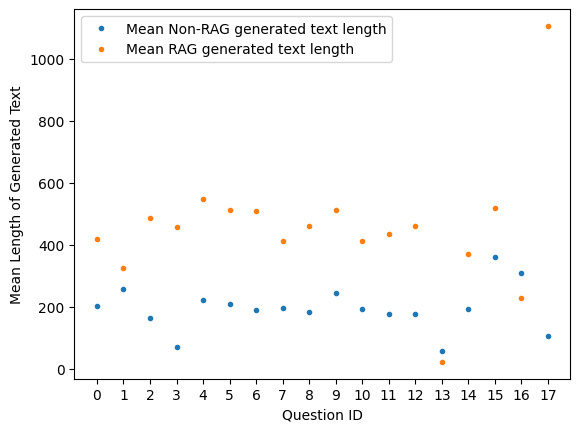

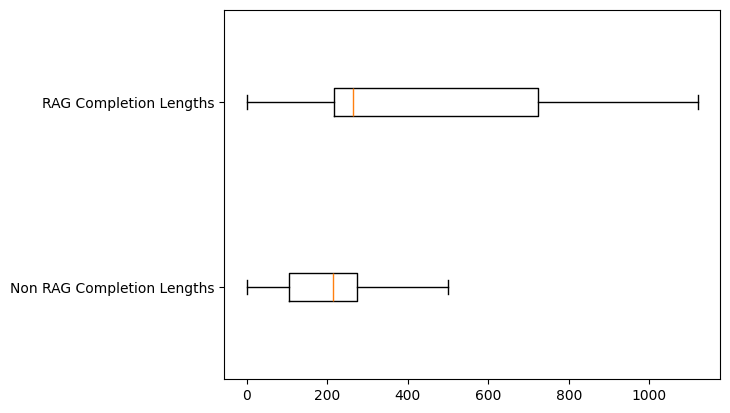

In [230]:
rag_rows = df[df["RAG"] == "RAG"]
non_rag_rows = df[df["RAG"] != "RAG"]

ds, comp_rag, comp_non_rag= generate_dataset(rag_rows, non_rag_rows)
ds = pd.DataFrame(ds, columns=["Question","Mean_RAG","Mean_NonRAG","Std_RAG","Std_NonRAG"])
print(ds["Question"])

plt.plot(ds.index, ds["Mean_NonRAG"],'.',label="Mean Non-RAG generated text length")
plt.plot(ds.index, ds["Mean_RAG"],'.',label="Mean RAG generated text length")
plt.xlabel("Question ID")
plt.ylabel("Mean Length of Generated Text")
plt.xticks([i for i in range(0,len(ds.index))])
plt.legend()
plt.show()

plt.boxplot([comp_non_rag, comp_rag], vert=False)
plt.yticks([1,2],["Non RAG Completion Lengths", "RAG Completion Lengths"])
plt.show()

#print(ds.head())
# print(len(rag_rows["Completion"]), len(non_rag_rows["Completion"]))
# plt.hist(rag_rows["Completion"], bins=50, label="RAG Completion")
# plt.hist(non_rag_rows["Completion"], bins=50, label="Non RAG Completion")
# plt.legend()
#plt.scatter(np.array(rag_rows["Completion"]),np.array(rag_rows["Similarity"]), c=np.array(rag_rows["Std"]),cmap="jet_r")
#plt.plot(np.array(rag_rows["Completion"]),np.array(rag_rows["Std"]),'.')
#plt.plot(np.array(rag_rows["VecHits"]),np.array(rag_rows["Mean"])-np.power(np.array(rag_rows["Std"]),2)/2,'.')
#plt.colorbar()
plt.show()

{'Tell me about break dance': 0, 'How does Java compare with scala and clojure': 1, 'Tell me about south delhi, india': 2, 'What is the book written by JRR Tolkien': 3, 'What are the gifts given to india by the US': 4, 'What can you tell me about Restriced Boltzmann machines?': 5, 'Tell me about global variables in Tibco business works': 6, 'Tell me about percieved value price': 7, 'Tell me about the land registry price paid data set': 8, 'Tell me about Prototypes in Javascript': 9, 'Tell me about 5G-PPP': 10, 'Tell me about the Tibco Action Processor': 11, 'Tell me about the Zodiac FX OpenFlow switch': 12, 'who is azahar machwe?': 13, 'tell me about influx db and currency data': 14, 'tell me about some weird errors with ActiveMQ': 15, 'can you do statistical analysis of tic tac toe with arbitrary grid size': 16, 'tell me about persimmons from Monkey King': 17}


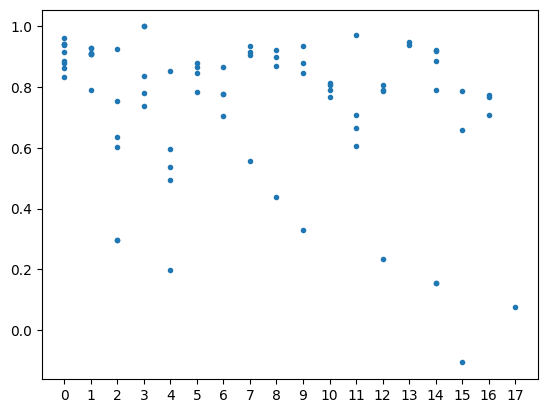

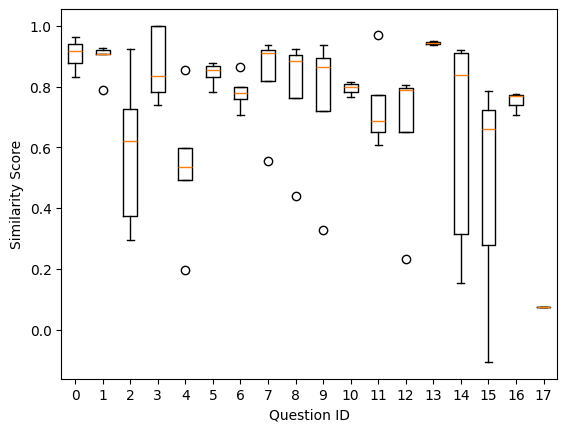

In [235]:
question_id_map = {q: idx for idx, q in enumerate(ds["Question"])}
print(question_id_map)

similarity = []
question_id = []
box_simi = {}
for i in df[df["RAG"]=="RAG"].iloc:
    similarity.append(i["Similarity"])
    qid = question_id_map[i["Query"]]
    question_id.append(qid)
    box_simi.setdefault(qid, []).append(i["Similarity"])


plt.plot(question_id, similarity,'.')
plt.xticks([i for i in range(0,len(question_id_map.keys()))])
plt.show()

bx = []
lbl = []
for k,v in box_simi.items():
    lbl.append(k)
    bx.append(v)

plt.boxplot(bx)
plt.xticks([i for i in range(1,len(lbl)+1)],lbl)
plt.xlabel("Question ID")
plt.ylabel("Similarity Score")
plt.show()

    

ValueError: x and y must have same first dimension, but have shapes (18,) and (79,)

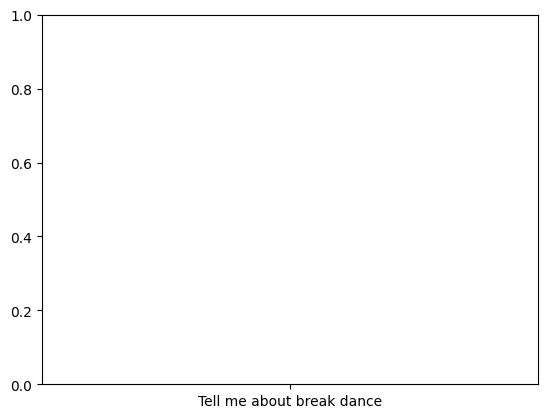

In [236]:
queries = list(set(df["Query"]))
score = []
hits = []
rag_score = []
rag_hits = []
rag_ctoq = []
ctoq = []
for q in queries:
    rows = df[df["Query"]==q]

    rag_rows = rows[rows["RAG"] == "RAG"]
    non_rag_rows = rows[rows["RAG"] != "RAG"]

    rag_score.extend(rag_rows["Similarity"])
    rag_hits.extend(rag_rows["VecHits"])

    score.extend(non_rag_rows["Similarity"])
    hits.extend(non_rag_rows["VecHits"])

#plt.plot(rag_hits, rag_score, ".")
#plt.plot(hits,score, ".")
plt.plot(queries,rag_hits)
plt.show()

plt.boxplot(rag_score)
print(np.max(rag_score), np.min(rag_score))
plt.show()